## Generate noisy observations from a polynomial

###### Assumptions: scalar output, scalar input.
###### Author: Rimple Sandhu, Carleton University; Email: rimple_sandhu@outlook.com

In [1]:
#!/usr/bin/python
import os, math, sys, random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
os.system('rm *.pdf *.eps *.png *.jpg');
os.system('rm figs/*');
np.random.seed(256)

#### Problem definition

In [2]:
def fn(X):
    return np.polyval([1,0,1],X)
d = 1 # dimension of input X
M = 25 # number of observations [50] 20: case with unimodal evid
rho = 100 # precision of measurement noise [25] 1
Xmin = [0] # minimum bounds of input [0] 0
Xmax = [1]  # maximum limit of input X [1] 1
mpl.rcParams.update({'font.size':12})

#### Generate noisy observations

In [3]:
X = np.zeros((M,d))
Y = np.zeros((M,1))
for i in range(0,d):
    X[:,i] = np.linspace(Xmin[i],Xmax[i],M)
for j in range(0,M):
    Y[j,0] = fn(X[j,:]) + np.random.randn()/np.sqrt(rho)
np.savetxt('Ydata.dat',Y)
np.savetxt('Xdata.dat',X)

#### Plot noisy vs true observations

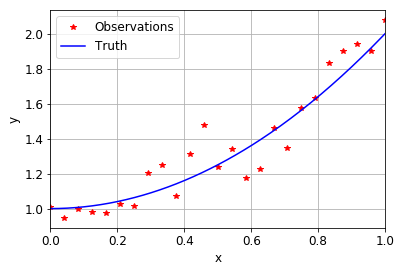

In [4]:
Mtrue = 200;
Xtrue = np.zeros((Mtrue,d))
Ytrue = np.zeros((Mtrue,1))
for i in range(0,d):
    Xtrue[:,i] = np.linspace(Xmin[i],Xmax[i],Mtrue)
for j in range(0,Mtrue):
    Ytrue[j,0] = fn(Xtrue[j,:])
fig = plt.figure(1)
plt.plot(X,Y,'r*',label='Observations')
plt.plot(Xtrue,Ytrue,'b-',label='Truth')
plt.grid(True)
plt.xlim([Xmin[0],Xmax[0]])
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best', numpoints = 1)
plt.savefig('figs/0_observations.eps',bbox_inches='tight')